Default Prediction in the loan process 
first of all we import all necessary libraries for the data cleaning and interpretation process

In [ ]:
#import all libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import itertools
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/dataset default/train.csv")

DATA INTERPRETATION 

In [ ]:
train.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 5480 entries, id to target
dtypes: float64(5476), int64(3), object(1)
memory usage: 1.0+ GB


In [ ]:
train.describe()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
count,22876.000000,22876.000000,22876.000000,22876.000000,22876.000000,22876.0,22876.000000,22876.000000,14250.000000,15220.000000,...,2183.000000,12.000000,6487.000000,656.000000,1104.000000,1026.000000,789.000000,7.000000,2570.000000,25000.000000
mean,0.047580,0.000962,0.000393,0.000437,0.000262,0.0,0.003251,0.004022,0.072058,0.109653,...,0.020516,0.285714,0.010233,0.021596,0.014560,0.026578,0.048247,0.178571,0.012042,0.146840
std,0.073311,0.017310,0.013400,0.020904,0.013221,0.0,0.028457,0.035609,0.102805,0.012076,...,0.047998,0.355189,0.025074,0.062241,0.041933,0.062204,0.099965,0.374007,0.032418,0.353953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.012048,0.106633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.015625,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.018072,0.106633,...,0.000000,0.142857,0.004167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.062500,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.096386,0.107524,...,0.017857,0.464286,0.012500,0.033333,0.018519,0.038462,0.066667,0.125000,0.008621,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.isnull().sum()

id              0
var_1        2124
var_2        2124
var_3        2124
var_4        2124
            ...  
var_5475    23974
var_5476    24211
var_5477    24993
var_5478    22430
target          0
Length: 5480, dtype: int64

In [ ]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5480 columns):
 #     Column    Dtype  
---    ------    -----  
 0     id        object 
 1     var_1     float64
 2     var_2     float64
 3     var_3     float64
 4     var_4     float64
 5     var_5     float64
 6     var_6     float64
 7     var_7     float64
 8     var_8     float64
 9     var_9     float64
 10    var_10    float64
 11    var_11    float64
 12    var_12    float64
 13    var_13    float64
 14    var_14    float64
 15    var_15    float64
 16    var_16    float64
 17    var_17    float64
 18    var_18    float64
 19    var_19    float64
 20    var_20    float64
 21    var_21    float64
 22    var_22    float64
 23    var_23    float64
 24    var_24    float64
 25    var_25    float64
 26    var_26    float64
 27    var_27    float64
 28    var_28    float64
 29    var_29    float64
 30    var_30    float64
 31    var_31    float64
 32    var_32    float64
 33    var_33 

In [ ]:
train

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,id_24996,0.078125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,0.017857,NaN,0.033333,NaN,NaN,NaN,NaN,NaN,NaN,0
24996,id_24997,0.078125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
24997,id_24998,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
24998,id_24999,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030120,...,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
train.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
train.isnull().sum()

id              0
var_1        2124
var_2        2124
var_3        2124
var_4        2124
            ...  
var_5475    23974
var_5476    24211
var_5477    24993
var_5478    22430
target          0
Length: 5480, dtype: int64

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/dataset default/test.csv")

In [ ]:
test.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,0.035714,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN
1,id_2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_3,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.describe()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.0,4592.000000,4592.000000,2829.000000,3031.000000,...,648.000000,392.000000,1.000000,1310.000000,121.000000,218.000000,214.000000,134.000000,1.0,502.000000
mean,0.046453,0.000817,0.000436,0.000653,0.000218,0.0,0.004573,0.002885,0.075551,0.109566,...,0.029686,0.021957,0.857143,0.010274,0.030303,0.014356,0.029116,0.054726,0.0,0.012656
std,0.071655,0.016062,0.013908,0.025554,0.010434,0.0,0.033199,0.030512,0.107377,0.009012,...,0.062627,0.058702,NaN,0.026486,0.119179,0.033117,0.073760,0.133045,NaN,0.036775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105247,...,0.000000,0.000000,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.012048,0.106633,...,0.000000,0.000000,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.015625,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.018072,0.106633,...,0.000000,0.000000,0.857143,0.004167,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.062500,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.108434,0.108117,...,0.026316,0.017857,0.857143,0.012500,0.033333,0.018519,0.038462,0.066667,0.0,0.008621
max,0.890625,0.500000,0.666667,1.000000,0.500000,0.0,0.875000,0.500000,0.897590,0.362099,...,0.605263,0.678571,0.857143,0.441667,1.200000,0.277778,0.769231,0.800000,0.0,0.474138


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 5479 entries, id to var_5478
dtypes: float64(5478), object(1)
memory usage: 209.0+ MB


In [ ]:
test.isnull().sum()

id             0
var_1        408
var_2        408
var_3        408
var_4        408
            ... 
var_5474    4782
var_5475    4786
var_5476    4866
var_5477    4999
var_5478    4498
Length: 5479, dtype: int64

In [ ]:
train.value_counts()

Series([], dtype: int64)

EXPLORATORY DATA ANALYSIS

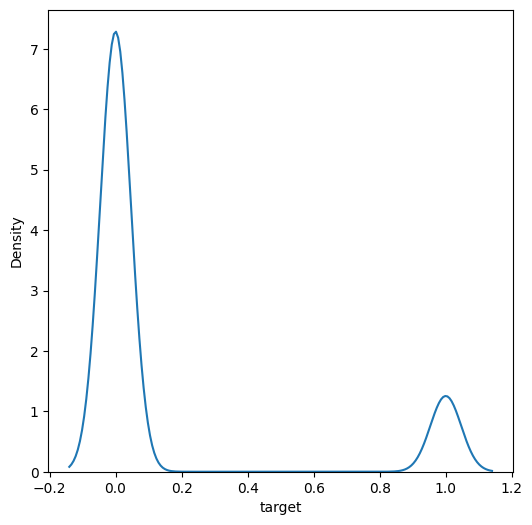

In [ ]:
#univariate distribution
plt.figure(figsize=(6,6))
sns.kdeplot(train['target'])
plt.show()

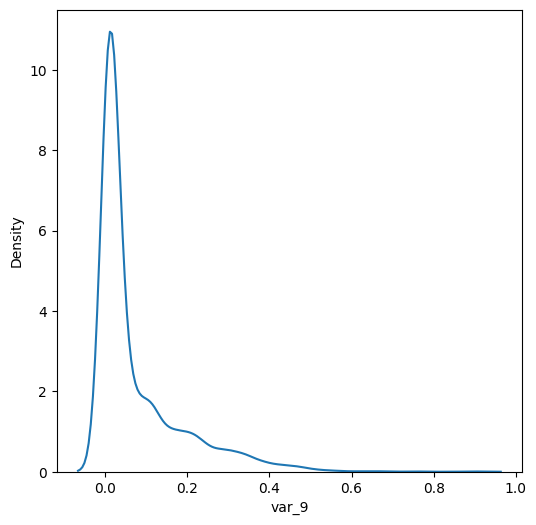

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(test['var_9'])
plt.show()

In [ ]:
#there is single point distribution found in test data because there are null values are in dataset 
#so thst we impute these null values by meadian 
test['var_9'].fillna(test['var_9'].median(),inplace = True)

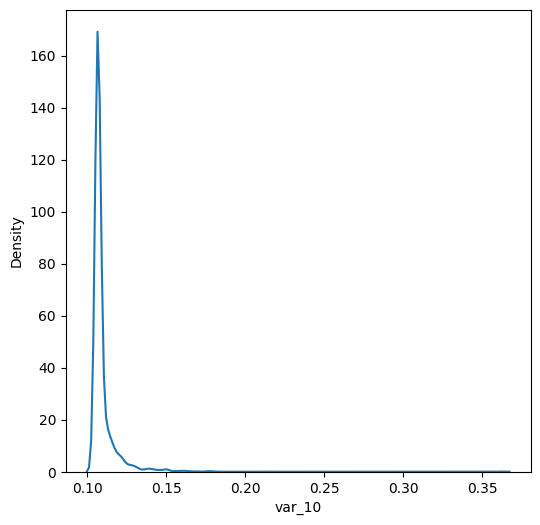

In [ ]:
#Impute random column with mode as the distribution is closely similar:
plt.figure(figsize=(6,6))
sns.kdeplot(test['var_10'][pd.notnull(test['var_10'])])
plt.show()

DATA PRE-PROCESSING

In [ ]:
new_train = train.loc[:, 'target']

In [ ]:
new_test = test.loc[:, 'id']

In [ ]:
New_test = pd.DataFrame({'id':new_test.index, 'id':new_test.values})

In [ ]:
New_test.to_csv("New_test.csv")

In [ ]:

New_train = pd.DataFrame({'ID':new_train.index, 'Target':new_train.values})

In [ ]:
New_train.head()

,ID,Target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
New_train.to_csv("New_train.csv")

In [ ]:
train = train.drop('id',axis=1)

In [ ]:
train = train.drop("target",axis=1)

In [ ]:
train.columns

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10',
       ...
       'var_5469', 'var_5470', 'var_5471', 'var_5472', 'var_5473', 'var_5474',
       'var_5475', 'var_5476', 'var_5477', 'var_5478'],
      dtype='object', length=5478)

In [ ]:
probability = train.iloc[1:25001].mean(axis=1)

In [ ]:
probability.to_csv("Probability_predicted.csv")

In [ ]:
test = test.drop('id', axis=1)

In [ ]:
test

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,0.015625,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.018072,0.128426,...,NaN,0.035714,NaN,0.012500,NaN,NaN,NaN,NaN,NaN,NaN
1,0.015625,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.018072,0.111644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.015625,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.012048,0.106633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.018072,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.046875,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.018072,0.106633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.015625,0.25,0.0,0.0,0.0,0.0,0.000,0.25,0.024096,0.122799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.093750,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.108434,0.106633,...,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.000000,0.00,0.0,0.0,0.0,0.0,0.125,0.00,0.367470,0.110760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,0.000000,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.018072,NaN,...,0.0,NaN,NaN,0.004167,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Test = test.iloc[1:5001].mean(axis=1)

In [ ]:
Test.head()

1         inf
2    0.016750
3         inf
4    0.015841
5         inf
dtype: float64

In [ ]:
Test1 = Test.replace([np.inf, -np.inf], 0)

In [ ]:
Test1

1       0.000000
2       0.016750
3       0.000000
4       0.015841
5       0.000000
          ...   
4995    0.000000
4996    0.012471
4997    0.013050
4998    0.025004
4999    0.013291
Length: 4999, dtype: float64

In [ ]:
Test1.to_csv("Test_data.csv")

In [ ]:
new_test = pd.read_csv("/content/drive/MyDrive/New_test.csv")
Test_data = pd.read_csv("/content/drive/MyDrive/Test_data.csv")

In [ ]:
new_test

,ID,id
0,0,id_1
1,1,id_2
2,2,id_3
3,3,id_4
4,4,id_5
...,...,...
4995,4995,id_4996
4996,4996,id_4997
4997,4997,id_4998
4998,4998,id_4999


In [ ]:
New_test = pd.DataFrame({'ID':new_train.index, 'id':new_train.values})

In [ ]:
New_test

,ID,id
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
24995,24995,0
24996,24996,0
24997,24997,0
24998,24998,1


In [ ]:
Test_data.head()

,ID,Predicted_probability
0,1,0.000000
1,2,0.016750
2,3,0.000000
3,4,0.015841
4,5,0.000000


In [ ]:
Test_data = pd.DataFrame({'ID':new_train.index, 'Predicted_probability':new_train.values})

In [ ]:
Test_data.head()

,ID,Predicted_probability
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
New_Test_Data = pd.merge(New_test,Test_data[["ID","Predicted_probability"]], on="ID", how='left')

In [ ]:
New_Test_Data.head()

,ID,id,Predicted_probability
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [ ]:
probability1 = train.iloc[1:5001].mean(axis=1)

In [ ]:
probability.to_csv("Probability_Predicted1.csv")

In [ ]:
Probability_mod = probability.replace([np.inf, -np.inf], 0)

In [ ]:
Probability_mod

1        0.020132
2        0.000000
3        0.000000
4        0.000000
5        0.000000
           ...   
24995    0.024716
24996    0.018024
24997    0.013902
24998    0.021357
24999    0.000000
Length: 24999, dtype: float64

In [ ]:
Probability_mod1 = probability1.replace([np.inf,-np.inf], 0)

In [ ]:
Probability_mod1

1       0.020132
2       0.000000
3       0.000000
4       0.000000
5       0.000000
          ...   
4996    0.000000
4997    0.000000
4998    0.000000
4999    0.000000
5000    0.017204
Length: 5000, dtype: float64

In [ ]:
Probability_mod.to_csv("Probability_pred.csv")

In [ ]:
Probability_mod1.to_csv("Probability_pred1.csv")

**now we download all the modifiled file after converting into csv **

In [ ]:
Train  = pd.read_csv("/content/drive/MyDrive/Probability_pred.csv")

In [ ]:
Test = pd.read_csv("/content/drive/MyDrive/Probability_pred1.csv")

In [ ]:
Train.head()

,ID,Predicted_probability
0,1,0.020132
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000


In [ ]:
Test.head()

,ID,predicted_Probability
0,1,0.020132
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000


In [ ]:
New_train = pd.read_csv("/content/drive/MyDrive/New_train.csv")

In [ ]:
New_train.head()

,Unnamed: 0,ID,Target
0,0,0,0
1,1,1,0
2,2,2,0
3,3,3,0
4,4,4,0


In [ ]:
New_Train = pd.DataFrame({'ID':new_train.index, 'Target':new_train.values})

In [ ]:
New_Train1 = pd.merge(New_train,Train[['ID','Predicted_probability']],on='ID', how='left')

In [ ]:
New_Train1.fillna(0)

,Unnamed: 0,ID,Target,Predicted_probability
0,0,0,0,0.000000
1,1,1,0,0.020132
2,2,2,0,0.000000
3,3,3,0,0.000000
4,4,4,0,0.000000
...,...,...,...,...
24995,24995,24995,0,0.024716
24996,24996,24996,0,0.018024
24997,24997,24997,0,0.013902
24998,24998,24998,1,0.021357


In [ ]:
New_Train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             25000 non-null  int64  
 1   ID                     25000 non-null  int64  
 2   Target                 25000 non-null  int64  
 3   Predicted_probability  24999 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 976.6 KB


In [ ]:
New_Train1.to_csv("New_Train1.csv")

In [ ]:
Df = pd.read_csv("New_Train1.csv")

In [ ]:
Df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Target,Predicted_probability
0,0,0,0,0,NaN
1,1,1,1,0,0.020132
2,2,2,2,0,0.000000
3,3,3,3,0,0.000000
4,4,4,4,0,0.000000


In [ ]:
Df.fillna(0)

,Unnamed: 0.1,Unnamed: 0,ID,Target,Predicted_probability
0,0,0,0,0,0.000000
1,1,1,1,0,0.020132
2,2,2,2,0,0.000000
3,3,3,3,0,0.000000
4,4,4,4,0,0.000000
...,...,...,...,...,...
24995,24995,24995,24995,0,0.024716
24996,24996,24996,24996,0,0.018024
24997,24997,24997,24997,0,0.013902
24998,24998,24998,24998,1,0.021357


In [ ]:
Df.to_csv("Training_data.csv")

In [ ]:
Training_data = pd.read_csv("/content/drive/MyDrive/Training_data.csv")

In [ ]:
Training_data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Target,Predicted_probability
0,0,0,0,0,0,0.000000
1,1,1,1,1,0,0.020132
2,2,2,2,2,0,0.000000
3,3,3,3,3,0,0.000000
4,4,4,4,4,0,0.000000


MODEL EVALUATION 

In [ ]:
X = Training_data["Target"].values
y = Training_data["Predicted_probability"].values

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
y_train = SC.fit_transform(y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,n_estimators=500)
reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
X_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 0.01401956,  0.01401956, -0.08132253, ...,  0.01401956,
        0.01401956,  0.01401956])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.03628801197880246

PREDICTED MODEL On TEST DATA SET 

In [ ]:
#now we have test data to
New_Test_Data.head()

,ID,id,Predicted_probability
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [ ]:
pd.DataFrame(New_Test_Data).to_csv("Final_results.csv")

In [ ]:
X1 = New_Test_Data["id"].values
y1 = New_Test_Data["Predicted_probability"].values

In [ ]:
X1 = X.reshape(-1,1)
y1= y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.33)

In [ ]:
X1_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
pd.DataFrame(X1_test).to_csv("predicted.csv")

In [ ]:
y1_pred = reg.predict(X1_test)

In [ ]:
y1_pred

array([ 0.01401956,  0.01401956, -0.08132253, ...,  0.01401956,
        0.01401956,  0.01401956])

In [ ]:
pd.DataFrame(y1_pred).to_csv("probability.csv")

In [ ]:
import pickle
pickle.dump(reg, open('model.pkl', 'wb'))

import pickle
from flask import Flask, request, jsonify, render_template

# load model
model = pickle.load(open('Defaultprediction.pickle','rb'))


In [ ]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1]]))

[-0.08132253]


In [ ]:
pip install streamlit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=0ea14256422be3e1d85b17de8e8e38c763db7556a05e9a425f019901c37f4df4
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


YOU CAN BUILD STREAM LIT APP 

In [ ]:
import streamlit as st 
prediction = st.sidebar.slider('Predicted_probability', 0.014019556, -0.081322535)

2023-04-08 10:04:57.993 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-08 10:04:58.142 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


FLASK API

In [ ]:
#Import libraries
import numpy as np
from flask import Flask, request, jsonify
import pickle
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load(open('Defaultprediction.pickle','rb'))

@app.route('/')
def home():
    return 'See this apps documentation on this <a href="https://github.com/arvind2u">github link</a>'
@app.route('/api',methods=['POST'])
def predict():
    # Get the data from the POST request.
    datas = request.get_json(force=True)

    # Make prediction using model loaded from disk
    pred=[]
    for data in datas:
        prediction = model.predict([np.array([data['LIMIT_BAL'], data['PAY_1'], data['BILL_AMT1']])])

        # Take the first value of prediction
        output = int(prediction[0])
        out = "Defaulter" if output == 1 else "Repayer"
        pred.append(out)
        
    return jsonify(pred)

In [ ]:
''' After analysing the datasets, there are few attributes of a client with which the bank would be able to 
identify if they will repay the loan or not.
main attributes from which bank can analyse the whole process that
1. NAME_HOUSING_TYPE
2. AMT_INCOME
3. AMT_CREDIT
4. CNT_CHILDREN AND CNT_FAM_MEMBERS
5.NAME_CASH_LOAN_PURPOSEB 
There are reasons behind rejecting the loan process by bank to many customers. 
 1. Either they are paying lately. Or they are paying with due amount. 
 2. Or they are not fit for  the terms and conditions of the bank. '''


' After analysing the datasets, there are few attributes of a client with which the bank would be able to \nidentify if they will repay the loan or not.\nmain attributes from which bank can analyse the whole process that\n1. NAME_HOUSING_TYPE\n2. AMT_INCOME\n3. AMT_CREDIT\n4. CNT_CHILDREN AND CNT_FAM_MEMBERS\n5.NAME_CASH_LOAN_PURPOSEB \nThere are reasons behind rejecting the loan process by bank to many customers. \n 1. Either they are paying lately. Or they are paying with due amount. \n 2. Or they are not fit for  the terms and conditions of the bank. '